# 粒子群最適化（PSO）

対応する動画」[【研究で使うPython】#26 粒子群最適化（PSO）プログラム編①](https://youtu.be/0nUEH58eMWw)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 手続き型で作成したプログラム

<IPython.core.display.Javascript object>


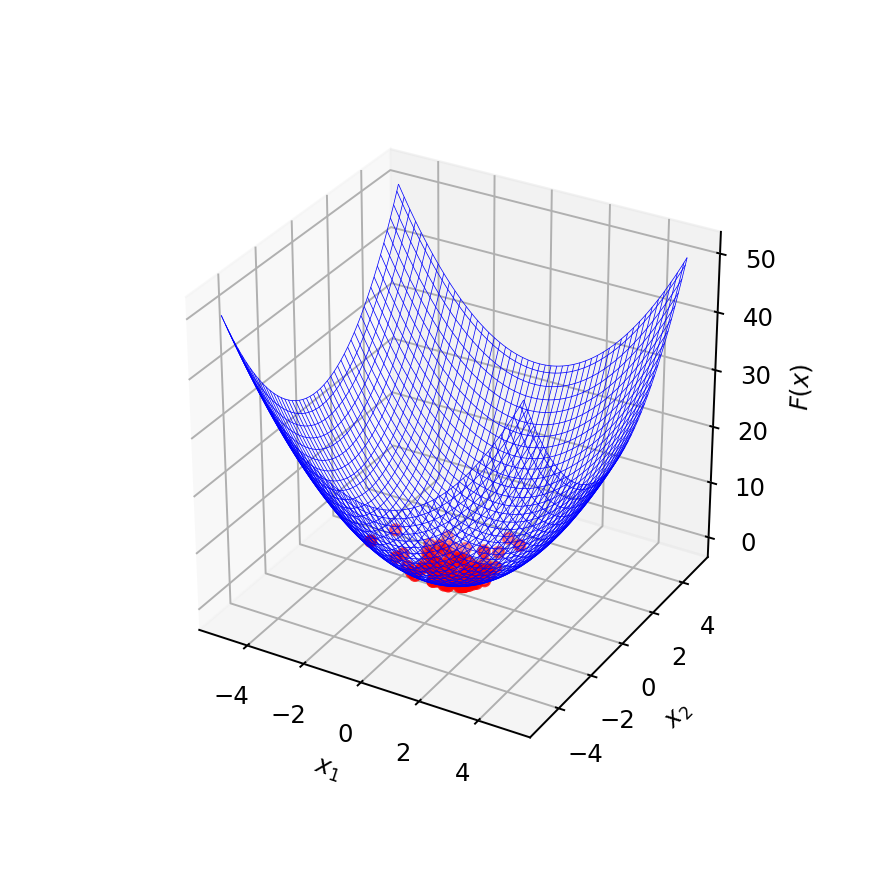

{'x1': -0.0037247945879086025, 'x2': -0.0009209756168758435}
1.4722290808993056e-05


In [1]:
%matplotlib nbagg
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 評価関数
def fitness(x1, x2):
    z = x1 * x1 + x2 * x2
    #z = 2*x1**2 - 1.05*x1**4 + (x1**6)/6 + x1*x2 + x2**2
    return z

# 粒子の位置の更新を行う関数
def update_position(x1, x2, vx1, vx2):
    new_x1 = x1 + vx1
    new_x2 = x2 + vx2
    return new_x1, new_x2

# 粒子の速度の更新を行う関数
def update_velocity(x1, x2, vx1, vx2, p, g, w=0.5, rho_max=0.14):
    # パラメーターrhoはランダムに与える
    rho1 = random.uniform(0, rho_max)
    rho2 = random.uniform(0, rho_max)
    # 粒子速度の更新を行う
    new_vx1 = w * vx1 + rho1 * (p["x1"] - x1) + rho2 * (g["x1"] - x1)
    new_vx2 = w * vx2 + rho1 * (p["x2"] - x2) + rho2 * (g["x2"] - x2)
    return new_vx1, new_vx2

N = 100  # 粒子の数
x1_min, x1_max = -5, 5
x2_min, x2_max = -5, 5
#x1_min, x1_max = -2, 2
#x2_min, x2_max = -2, 2

# 粒子位置, 速度, パーソナルベスト, グローバルベストの初期化を行う
ps = [{"x1": random.uniform(x1_min, x1_max), "x2": random.uniform(x2_min, x2_max)} for i in range(N)]
vs = [{"x1": 0.0, "x2": 0.0} for i in range(N)]
personal_best_positions = ps
personal_best_scores = [fitness(p["x1"], p["x2"]) for p in ps]
best_particle = np.argmin(personal_best_scores)
global_best_position = personal_best_positions[best_particle]
#print(personal_best_positions)
#print(personal_best_scores)
#print(best_particle)
#print(global_best_position)

# アニメーション作成用
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$F(x)$')

x1_coord = np.linspace(x1_min, x1_max, 100)
x2_coord = np.linspace(x2_min, x2_max, 100)
X, Y = np.meshgrid(x1_coord, x2_coord)

ax.plot_wireframe(X, Y, fitness(X, Y), color='b',rstride=2, cstride=2, linewidth=0.3)
ims = []

T = 30  # 制限時間(ループの回数)
for t in range(T):
    for i in range(N):
        x1, x2 = ps[i]["x1"], ps[i]["x2"]
        vx1, vx2 = vs[i]["x1"], vs[i]["x2"]
        p = personal_best_positions[i]
        # 粒子の位置の更新を行う
        new_x1, new_x2 = update_position(x1, x2, vx1, vx2)
        ps[i] = {"x1": new_x1, "x2": new_x2}
        # 粒子の速度の更新を行う
        new_vx1, new_vx2 = update_velocity(
            new_x1, new_x2, vx1, vx2, p, global_best_position)
        vs[i] = {"x1": new_vx1, "x2": new_vx2}
        # 評価値を求め, パーソナルベストの更新を行う
        score = fitness(new_x1, new_x2)
        if score < personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = {"x1": new_x1, "x2": new_x2}
    # グローバルベストの更新を行う
    best_particle = np.argmin(personal_best_scores)
    global_best_position = personal_best_positions[best_particle]
    im = ax.scatter3D([ps[i]["x1"] for i in range(N)],
                      [ps[i]["x2"] for i in range(N)],
                      [fitness(ps[i]["x1"], ps[i]["x2"]) for i in range(N)], c='r')
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims)
#ani.save('./anim_PSO.gif', writer='pillow') 
# 最適解
print(global_best_position)
print(min(personal_best_scores))